#### Library Importations
- These are the Data analysis and vizualization tools being used for the assignment.

In [204]:
import datetime
import time
import numpy as np
import pandas as pd
import matplotlib as plt

#### Import Data file
- Importing and storing the data from the `.csv` file being used for the assignment.

In [327]:
data = pd.read_csv('files/company_A_call_records.csv', parse_dates=['call_end_date'])

# Add call_start_date
data['call_start_date'] = pd.Timestamp(year=2017, month=1, day=1, hour=0, minute=0)
data['call_start_date'] = data['call_start_date'].dt.time

# Coverting call_end_date time
data.call_end_date = data.call_end_date.dt.time

# Covert call_duration to int
data.call_duration = round(data.call_duration).astype(int)

#### Getting the summary of our data

In [328]:
data.head()

,call_id,destination_person_id,source_person_id,account_age,account_state,occupation,language,call_direction,call_duration,call_outcome,call_end_date,call_topics,call_topic_group,call_start_date
0,2807990,86394,269898,301,In Repayment,Farmer,Luganda,Incoming,1,Call Resolved,04:01:00,Call Dropped,Other,00:00:00
1,2807991,86394,320367,122,In Repayment,Other,Luganda,Incoming,2,Call Resolved,04:04:00,Code Not Received,Codes,00:00:00
2,2807992,212967,129042,695,In Repayment,Mechanic / Technician,Luganda,Incoming,5,Call Resolved,04:05:00,RP Remote Technical,Accessory Technical Issue,00:00:00
3,2807993,114159,372282,22,In Repayment,Farmer,Lango,Incoming,4,Call Resolved,04:06:00,Code Not Received,Codes,00:00:00
4,2807994,86394,366749,44,In Repayment,Electrician,Luganda,Incoming,3,Call Resolved,04:07:00,Code Not Received,Codes,00:00:00


In [329]:
# The number of rows and columns in the data set
data.shape

(32028, 14)

In [330]:
# Additional useful information about the columns in the data set.(column name, data type)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32028 entries, 0 to 32027
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   call_id                32028 non-null  int64 
 1   destination_person_id  32028 non-null  int64 
 2   source_person_id       32028 non-null  int64 
 3   account_age            32028 non-null  int64 
 4   account_state          32028 non-null  object
 5   occupation             31933 non-null  object
 6   language               32027 non-null  object
 7   call_direction         32028 non-null  object
 8   call_duration          32028 non-null  int32 
 9   call_outcome           32028 non-null  object
 10  call_end_date          32028 non-null  object
 11  call_topics            32028 non-null  object
 12  call_topic_group       32028 non-null  object
 13  call_start_date        32028 non-null  object
dtypes: int32(1), int64(4), object(9)
memory usage: 3.3+ MB


##### Question 1
**1.1**. How many customers called Company_A multiple times in the 2 week period?

In [340]:
# Step 1: Extract all incoming calls from the overall data set since we are looking for Customers who called in
callers = data[data.call_direction == 'Incoming'].source_person_id.value_counts()

# Step 2: Filter out callers who called in more than once (multiple times == 2 or more times)
frequent_callers = data.loc[callers[callers >= 2]]

# Step 3: Get number of customers who called in multiple times
print('Number of customers who called in multiple times is: {num_callers}'.format(num_callers = frequent_callers.shape[0]))

Number of customers who called in multiple times is: 5346


**1.2**. What were we discussing with the customers who contacted us multiple times?

In [332]:
# Get the count of call_topics to see which tags were used by CSRs
frequent_callers.call_topics.value_counts()

RP Remote Technical                     2988
Code Not Received                       1830
Code Entered Late, Code Not Received     249
General Question                         133
Call transfer                            106
Ended Call- Hearing/Speaking Issues       16
Payment inquiry                           10
ReadyRefer 3 Days Inquiry                  7
Account Association                        2
Does Not Charge From Mains                 2
Customer NOT with PS                       2
Code Entry Support                         1
Name: call_topics, dtype: int64

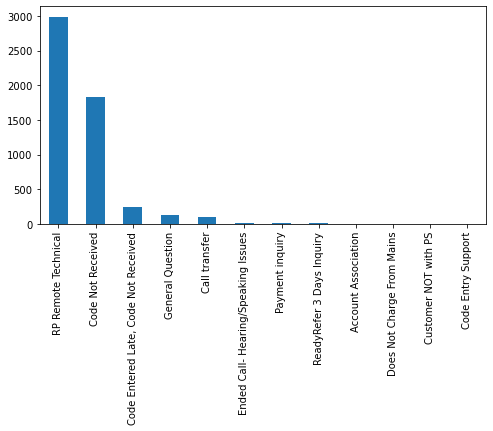

In [333]:
# A better visual of the topics discussed by the callers
frequent_callers.call_topics.value_counts().plot(kind='bar', figsize=(8, 4))

##### Question 2
Should we be looking at a customer's occupation when we decide when to call
them?

In [347]:
# Get information on Outgoing calls
outgoing_calls = data.loc[data.call_direction == 'Outgoing']
#Get customer occupation stats
# data[data.call_direction == 'Outgoing']

##### Question 3
From region of the country do we have the greatest number of customers?

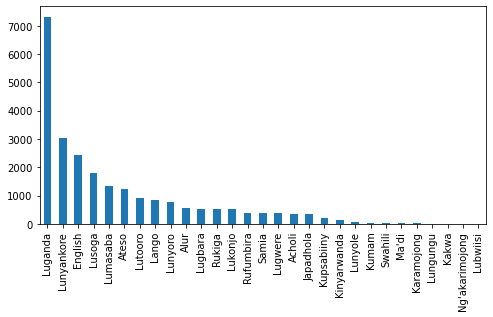

In [346]:
# Step 1: Extract all incoming calls from the overall data set since we are looking for Customers who called in
callers = data[data.call_direction == 'Incoming']

# Step 2: Get number of callers per region using the 'language' column
callers_per_region = callers.language.value_counts()
callers_per_region.plot(kind='bar', figsize=(8, 4))

##### Question 4
Which language speaking customer care personnel should we employ most?

In [47]:
data.loc[data['call_direction'] == 'Outgoing', 'source_person_id'].value_counts()

212968    734
212954    570
212970    514
100497    400
77156     400
         ... 
157381      3
338396      2
81050       2
11151       2
338352      2
Name: source_person_id, Length: 91, dtype: int64

In [29]:
data.loc[data['call_direction'] == 'Incoming', 'language'].value_counts()

Luganda           7320
Lunyankore        3054
English           2422
Lusoga            1798
Lumasaba          1331
Ateso             1243
Lutooro            899
Lango              830
Lunyoro            770
Alur               558
Lugbara            539
Rukiga             525
Lukonjo            522
Rufumbira          399
Samia              393
Lugwere            374
Acholi             352
Japadhola          348
Kupsabiiny         215
Kinyarwanda        156
Lunyole             64
Kumam               49
Swahili             39
Ma'di               33
Karamojong          17
Lungungu            14
Kakwa               12
Ng'akarimojong       8
Lubwiisi             2
Name: language, dtype: int64

In [34]:
data.loc[data['call_direction'] == 'Incoming', 'call_topic_group'].value_counts()

Codes                                  7159
Other                                  5341
Finance                                3741
Sales                                  3261
Technical/ Battery Performance         2025
General                                1261
Accessory Technical Issue               651
Accounts                                532
Accessory Non-Technical Issue           176
Portfolio Health                        130
Unsellable Kit (Association Errors)       9
Name: call_topic_group, dtype: int64

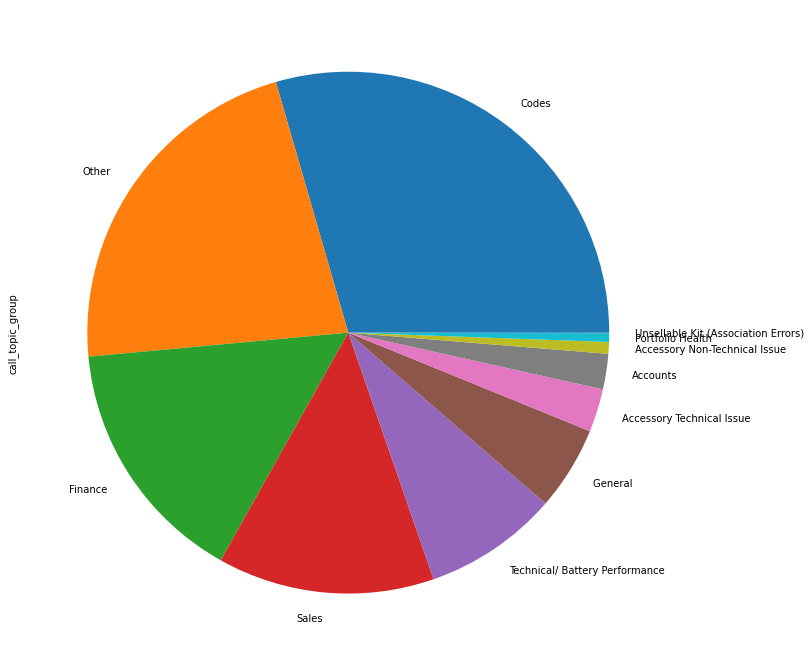

In [37]:
data.loc[data['call_direction'] == 'Incoming', 'call_topic_group'].value_counts().plot(kind='pie', figsize=(12,12))

In [36]:
data.loc[data['call_direction'] == 'Outgoing', 'call_topic_group'].value_counts()

Survey                                 5729
Finance                                 719
Sales                                   509
Other                                   481
General                                  98
Codes                                    85
Portfolio Health                         58
Technical/ Battery Performance           32
Accessory Technical Issue                14
Accounts                                 10
Accessory Non-Technical Issue             4
Unsellable Kit (Association Errors)       3
Name: call_topic_group, dtype: int64